In [1]:
import glob
import numpy as np
import pandas as pd
import scipy
from nilearn import plotting


/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [215]:
# first load all seed based files
files_ses1 = glob.glob('/home/or/kpe_conn/trauma_seed_amg_right_sub-*_ses-1_z.nii.gz')
files_ses2 = glob.glob('/home/or/kpe_conn/trauma_seed_amg_right_sub-*_ses-2_z.nii.gz')
print(files_ses1)
len(files)

['/home/or/kpe_conn/trauma_seed_amg_right_sub-1253_ses-1_z.nii.gz', '/home/or/kpe_conn/trauma_seed_amg_right_sub-1499_ses-1_z.nii.gz', '/home/or/kpe_conn/trauma_seed_amg_right_sub-1403_ses-1_z.nii.gz', '/home/or/kpe_conn/trauma_seed_amg_right_sub-1464_ses-1_z.nii.gz', '/home/or/kpe_conn/trauma_seed_amg_right_sub-008_ses-1_z.nii.gz', '/home/or/kpe_conn/trauma_seed_amg_right_sub-1468_ses-1_z.nii.gz', '/home/or/kpe_conn/trauma_seed_amg_right_sub-1223_ses-1_z.nii.gz', '/home/or/kpe_conn/trauma_seed_amg_right_sub-1263_ses-1_z.nii.gz', '/home/or/kpe_conn/trauma_seed_amg_right_sub-1307_ses-1_z.nii.gz', '/home/or/kpe_conn/trauma_seed_amg_right_sub-1322_ses-1_z.nii.gz', '/home/or/kpe_conn/trauma_seed_amg_right_sub-1387_ses-1_z.nii.gz', '/home/or/kpe_conn/trauma_seed_amg_right_sub-1480_ses-1_z.nii.gz', '/home/or/kpe_conn/trauma_seed_amg_right_sub-1369_ses-1_z.nii.gz', '/home/or/kpe_conn/trauma_seed_amg_right_sub-1364_ses-1_z.nii.gz', '/home/or/kpe_conn/trauma_seed_amg_right_sub-1356_ses-1_z.nii.

21

In [216]:
# reading the files back
from nilearn.input_data import NiftiMasker
# here I use a masked image so all will have same size
nifti_masker = NiftiMasker(
    mask_img= '/media/Data/KPE_fmriPrep_preproc/kpeOutput/derivatives/fmriprep/sub-008/ses-2/func/sub-008_ses-2_task-Memory_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz',
    smoothing_fwhm=5,
    memory='nilearn_cache', memory_level=1)  # cache options
fmri_AmgR_masked_ses1 = nifti_masker.fit_transform(files_ses1)
fmri_AmgR_masked_ses2 = nifti_masker.fit_transform(files_ses2)


In [231]:
from nilearn import input_data
brain_masker = input_data.NiftiMasker(
        smoothing_fwhm=6,
        detrend=True, standardize=True,
        low_pass=0.1, high_pass=0.01, t_r=1.,
        memory='/media/Data/nilearn', memory_level=1, verbose=2)
brain_masker.fit(files_ses2)

[NiftiMasker.fit] Loading data from [/home/or/kpe_conn/trauma_seed_amg_right_sub-1253_ses-2_z.nii.gz, /home/or/kpe_conn/trauma_seed_amg_right_sub-1480_ses-2_z.nii.gz, /home/or/kpe_conn/trauma_seed_amg_right_sub-1356_ses-2_z.nii.gz, /hom
[NiftiMasker.fit] Computing the mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_background_mask...
compute_background_mask([ '/home/or/kpe_conn/trauma_seed_amg_right_sub-1253_ses-2_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_amg_right_sub-1480_ses-2_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_amg_right_sub-1356_ses-2_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_amg_right_sub-1223_ses-2_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_amg_right_sub-1403_ses-2_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_amg_right_sub-1322_ses-2_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_amg_right_sub-1369_ses-2_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_amg_right_sub-008_ses-2_z.nii.gz',
  '/home/o

NiftiMasker(detrend=True, dtype=None, high_pass=0.01, low_pass=0.1,
            mask_args=None, mask_img=None, mask_strategy='background',
            memory=Memory(cachedir='/media/Data/nilearn/joblib'),
            memory_level=1, sample_mask=None, sessions=None, smoothing_fwhm=6,
            standardize=True, t_r=1.0, target_affine=None, target_shape=None,
            verbose=2)

In [247]:
deltaCor = fmri_AmgR_masked_ses2 - fmri_AmgR_masked_ses1
print (f'Shape is: {deltaCor.shape}')

# run paired t-test 
testDelta = scipy.stats.ttest_rel(fmri_AmgR_masked_ses1, fmri_AmgR_masked_ses2) 
np.sum(testDelta[1]<0.005)

Shape is: (21, 265033)


1543

In [236]:
# results before thresholding
%matplotlib inline
# mean across subjects
mean_zcor_Delta = np.mean(deltaCor,0)
mean_zcor_Delta.shape

(265033,)

[Memory]  164.2s, 2.7min: Loading unmask...


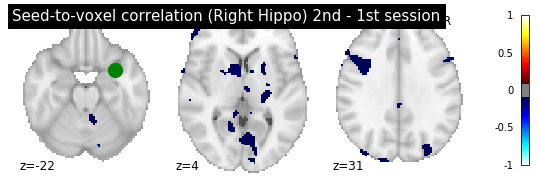

In [241]:
# before using that we need to run and fit brain masker at least on one subject
amygdala_coords = [(31,4,-22)]
mean_zcor_img_delta = brain_masker.inverse_transform(mean_zcor_Delta.T)
from nilearn import plotting
display = plotting.plot_stat_map(mean_zcor_img_delta,
                                     threshold=0.1, vmax=1,
                                     cut_coords=amygdala_coords[0],
                                     title="Seed-to-voxel correlation (Right Hippo) 2nd - 1st session", display_mode = 'z',
                                     )
display.add_markers(marker_coords=amygdala_coords, marker_color='g',
                    marker_size=200)

In [257]:
# treshold
FWE_thr = 0.05/26503 #len(mean_zcor_Delta)
len(mean_zcor_Delta)/10

26503.3

Number of voxels crossed the FWE thr is 0
[Memory]  473.1s, 7.9min: Loading unmask...


/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


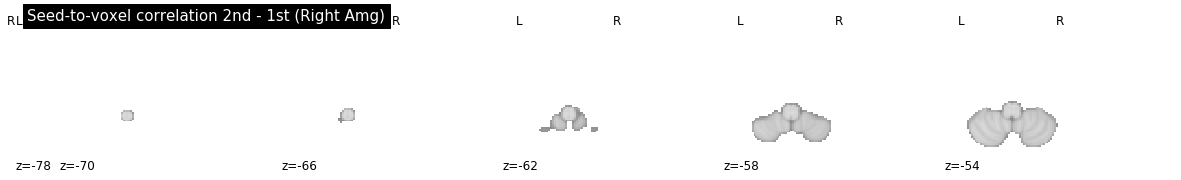

In [258]:
corr_matDelta_thr = np.array(mean_zcor_Delta)
# now I can treshold the mean matrix
corr_matDelta_thr[testDelta[1]>FWE_thr] = 0 # everything that has p value larger than treshold becomes zero 
numNonZeroDelta = np.count_nonzero(corr_matDelta_thr)
print (f'Number of voxels crossed the FWE thr is {numNonZeroDelta}')
# transofrm it back to nifti
thr_nifti_delta = brain_masker.inverse_transform(corr_matDelta_thr.T)
%matplotlib inline
display = plotting.plot_stat_map(thr_nifti_delta,
                                     vmax=1,
                                     threshold = 0.1,
                                     title="Seed-to-voxel correlation 2nd - 1st (Right Amg)", display_mode = 'z',
                                     )
display.add_markers(marker_coords=amygdala_coords, marker_color='g',
                    marker_size=200)

In [254]:
# now lets try FDR
from statsmodels.stats import multitest
# we need to reshape the test p-values array to create 1D array
#b = np.reshape(np.array(testDelta[1]), -1)
fdr_mat = multitest.multipletests(testDelta[1], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
#fdr_mat = multitest.fdrcorrection(testDelta[1], alpha=0.7, method='indep', is_sorted=False)

np.sum(fdr_mat[1]<0.01)
#fdr_mat[1]

0

In [27]:
tested_var = [1] * 21
tested_var = np.array(tested_var).reshape(-1,1)
tested_var

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [78]:
from nilearn.input_data import NiftiMasker
nifti_masker = NiftiMasker(
    smoothing_fwhm=0,
    memory='nilearn_cache', memory_level=1)  # cache options
fmri_masked_ses1 = nifti_masker.fit_transform(files_ses1)
fmri_masked_ses2 = nifti_masker.fit_transform(files_ses2)

In [38]:
from nilearn import mass_univariate
neg_log_pvals_permuted_ols, _, _ = mass_univariate.permuted_ols(tested_var, fmri_masked, confounding_vars=None, model_intercept=True, 
                                     n_perm=50, two_sided_test=True, random_state=None, n_jobs=1, verbose=5)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished


In [39]:
neg_log_pvals_permuted_ols_unmasked = nifti_masker.inverse_transform(
    np.ravel(neg_log_pvals_permuted_ols))

<Figure size 432x288 with 0 Axes>

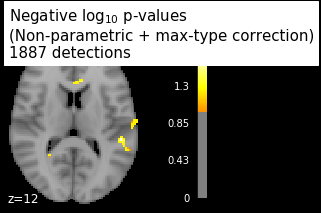

In [49]:
from nilearn.plotting import plot_stat_map, show
import matplotlib.pyplot as plt
# Various plotting parameters
z_slice = 12  # plotted slice

threshold = - np.log10(0.1)  # 10% corrected
vmax = np.max(neg_log_pvals_permuted_ols)

# Plot permuted OLS p-values
fig = plt.figure() #(figsize=(5, 7), facecolor='k')

display = plot_stat_map(neg_log_pvals_permuted_ols_unmasked,
                        threshold=threshold,
                        display_mode='z', cut_coords=[z_slice],
                        vmax=vmax, black_bg=True)

n_detections = (neg_log_pvals_permuted_ols_unmasked.get_data()
                > threshold).sum()
title = ('Negative $\log_{10}$ p-values'
         '\n(Non-parametric + max-type correction)'
         '\n%d detections') % n_detections

display.title(title, y=1.2)

show()

In [52]:
from nilearn import mass_univariate
neg_log_pvals_permuted_ols2, _, _ = mass_univariate.permuted_ols(tested_var, fmri_masked2, confounding_vars=None, model_intercept=True, 
                                     n_perm=50, two_sided_test=True, random_state=None, n_jobs=1, verbose=5)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished


In [53]:
neg_log_pvals_permuted_ols_unmasked2 = nifti_masker.inverse_transform(
    np.ravel(neg_log_pvals_permuted_ols2))

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/plotting/displays.py:1582: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fraction * (x1 - x0), y1 - y0])


<Figure size 432x288 with 0 Axes>

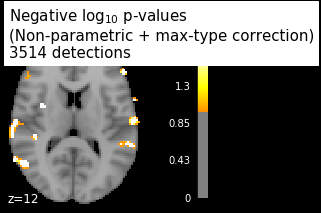

In [54]:
z_slice = 12  # plotted slice

threshold = - np.log10(0.1)  # 10% corrected
vmax = np.max(neg_log_pvals_permuted_ols2)

# Plot permuted OLS p-values
fig = plt.figure() #(figsize=(5, 7), facecolor='k')

display = plot_stat_map(neg_log_pvals_permuted_ols_unmasked2,
                        threshold=threshold,
                        display_mode='z', cut_coords=[z_slice],
                        vmax=vmax, black_bg=True)

n_detections = (neg_log_pvals_permuted_ols_unmasked2.get_data()
                > threshold).sum()
title = ('Negative $\log_{10}$ p-values'
         '\n(Non-parametric + max-type correction)'
         '\n%d detections') % n_detections

display.title(title, y=1.2)

show()

In [83]:
from nilearn import input_data
brain_masker = input_data.NiftiMasker(
        smoothing_fwhm=6,
        detrend=True, standardize=True,
        low_pass=0.1, high_pass=0.01, t_r=1.,
        memory='/media/Data/nilearn', memory_level=1, verbose=2)
brain_masker.fit(files_ses2)

[NiftiMasker.fit] Loading data from [/home/or/kpe_conn/trauma_seed_sub-1464_ses-2_z.nii.gz, /home/or/kpe_conn/trauma_seed_sub-008_ses-2_z.nii.gz, /home/or/kpe_conn/trauma_seed_sub-1351_ses-2_z.nii.gz, /home/or/kpe_conn/trauma_seed_sub-1
[NiftiMasker.fit] Computing the mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_background_mask...
compute_background_mask([ '/home/or/kpe_conn/trauma_seed_sub-1464_ses-2_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_sub-008_ses-2_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_sub-1351_ses-2_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_sub-1369_ses-2_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_sub-1263_ses-2_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_sub-1339_ses-2_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_sub-1387_ses-2_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_sub-1499_ses-2_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_sub-1223_ses-2_z.nii.gz',
  '/home/or/kpe_conn/trauma_see

NiftiMasker(detrend=True, dtype=None, high_pass=0.01, low_pass=0.1,
            mask_args=None, mask_img=None, mask_strategy='background',
            memory=Memory(cachedir='/media/Data/nilearn/joblib'),
            memory_level=1, sample_mask=None, sessions=None, smoothing_fwhm=6,
            standardize=True, t_r=1.0, target_affine=None, target_shape=None,
            verbose=2)

[Memory]  139.1s, 2.3min: Loading unmask...


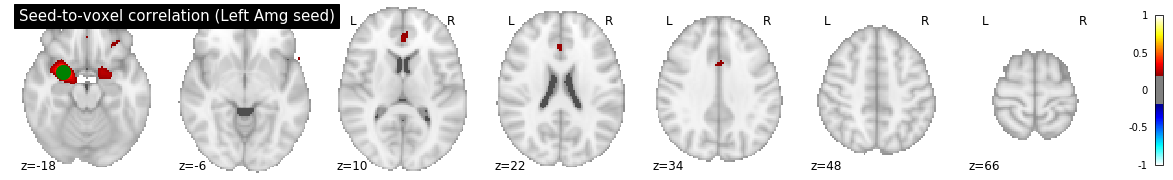

In [71]:
import scipy
import numpy as np
amygdala_coords = [(-26, 2, -18)]#, (31,4,-22)]
# start with simple t test and tresholding
test = scipy.stats.ttest_1samp(fmri_masked,0,0)
%matplotlib inline
# mean across subjects
mean_zcor = np.mean(fmri_masked,0)
# before using that we need to run and fit brain masker at least on one subject

mean_zcor_img = brain_masker.inverse_transform(mean_zcor.T)
from nilearn import plotting
display = plotting.plot_stat_map(mean_zcor_img,
                                     threshold=0.2, vmax=1,
                                     
                                     title="Seed-to-voxel correlation (Left Amg seed)", display_mode = 'z',
                                     )
display.add_markers(marker_coords=amygdala_coords, marker_color='g',
                    marker_size=200)

Number of voxels crossed the FWE thr is 667
[Memory]  159.0s, 2.6min: Loading unmask...


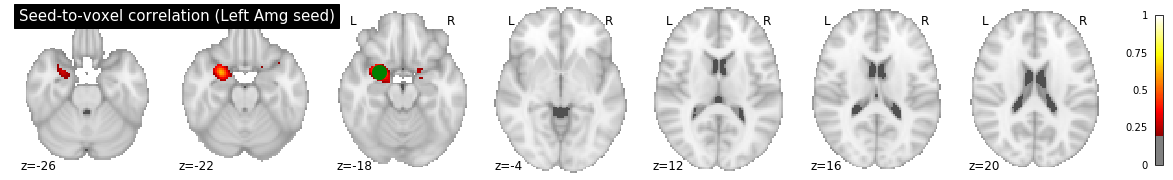

In [72]:
# treshold
#FWE
FWE_thr = 0.05/len(mean_zcor)
# create new matrix for correction
corr_mat_thr = np.array(mean_zcor)
# now I can treshold the mean matrix
corr_mat_thr[test[1]>FWE_thr] = 0 # everything that has p value larger than treshold becomes zero 
numNonZero = np.count_nonzero(corr_mat_thr)
print (f'Number of voxels crossed the FWE thr is {numNonZero}')
# transofrm it back to nifti
thr_nifti = brain_masker.inverse_transform(corr_mat_thr.T)
%matplotlib inline
display = plotting.plot_stat_map(thr_nifti,
                                      vmax=1,
                                     threshold = 0.2,
                                     title="Seed-to-voxel correlation (Left Amg seed)", display_mode = 'z',
                                     )
display.add_markers(marker_coords=amygdala_coords, marker_color='g',
                    marker_size=200)

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([0.061305, ..., 0.122313]), <nibabel.nifti1.Nifti1Image object at 0x7f967d447450>)
___________________________________________________________unmask - 0.1s, 0.0min


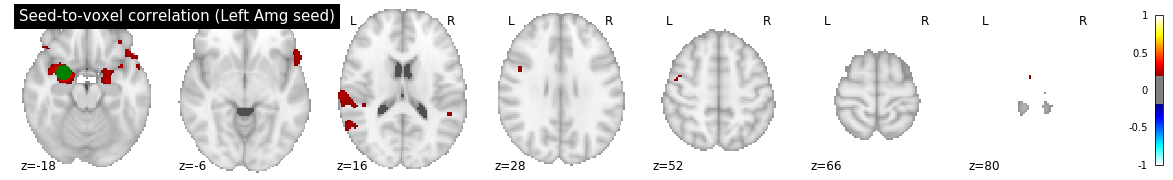

In [84]:
# now we should compare the two sessions
test = scipy.stats.ttest_1samp(fmri_masked_ses2,0,0)
%matplotlib inline
# mean across subjects
mean_zcor = np.mean(fmri_masked_ses2,0)
# before using that we need to run and fit brain masker at least on one subject

mean_zcor_img = brain_masker.inverse_transform(mean_zcor.T)
from nilearn import plotting
display = plotting.plot_stat_map(mean_zcor_img,
                                     threshold=0.2, vmax=1,
                                     
                                     title="Seed-to-voxel correlation (Left Amg seed)", display_mode = 'z',
                                     )
display.add_markers(marker_coords=amygdala_coords, marker_color='g',
                    marker_size=200)

In [85]:
# Hippocampus
files_ses1_h = glob.glob('/home/or/kpe_conn/trauma_seed_hippocampus_right_sub-*_ses-1_z.nii.gz')
files_ses2_h = glob.glob('/home/or/kpe_conn/trauma_seed_hippocampus_right_sub-*_ses-2_z.nii.gz')

In [95]:
from nilearn.input_data import NiftiMasker
# here I use a masked image so all will have same size
nifti_masker = NiftiMasker(
    mask_img= '/media/Data/KPE_fmriPrep_preproc/kpeOutput/derivatives/fmriprep/sub-008/ses-2/func/sub-008_ses-2_task-Memory_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz',
    smoothing_fwhm=5,
    memory='nilearn_cache', memory_level=1)  # cache options
fmri_Hipp_masked_ses1 = nifti_masker.fit_transform(files_ses1_h)
fmri_Hipp_masked_ses2 = nifti_masker.fit_transform(files_ses2_h)


In [87]:
from nilearn import input_data
brain_masker = input_data.NiftiMasker(
        smoothing_fwhm=6,
        detrend=True, standardize=True,
        low_pass=0.1, high_pass=0.01, t_r=1.,
        memory='/media/Data/nilearn', memory_level=1, verbose=2)
brain_masker.fit(files_ses1_h)

[NiftiMasker.fit] Loading data from [/home/or/kpe_conn/trauma_seed_hippocampus_right_sub-1315_ses-1_z.nii.gz, /home/or/kpe_conn/trauma_seed_hippocampus_right_sub-008_ses-1_z.nii.gz, /home/or/kpe_conn/trauma_seed_hippocampus_right_sub-12
[NiftiMasker.fit] Computing the mask
________________________________________________________________________________
[Memory] Calling nilearn.masking.compute_background_mask...
compute_background_mask([ '/home/or/kpe_conn/trauma_seed_hippocampus_right_sub-1315_ses-1_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_hippocampus_right_sub-008_ses-1_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_hippocampus_right_sub-1223_ses-1_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_hippocampus_right_sub-1343_ses-1_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_hippocampus_right_sub-1499_ses-1_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_hippocampus_right_sub-1351_ses-1_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_hippocampus_right_sub-1390_ses-1_z.nii.gz',
  '/home/or/kpe_conn/tr

NiftiMasker(detrend=True, dtype=None, high_pass=0.01, low_pass=0.1,
            mask_args=None, mask_img=None, mask_strategy='background',
            memory=Memory(cachedir='/media/Data/nilearn/joblib'),
            memory_level=1, sample_mask=None, sessions=None, smoothing_fwhm=6,
            standardize=True, t_r=1.0, target_affine=None, target_shape=None,
            verbose=2)

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([0.090009, ..., 0.062994]), <nibabel.nifti1.Nifti1Image object at 0x7f96709fc650>)
___________________________________________________________unmask - 0.1s, 0.0min


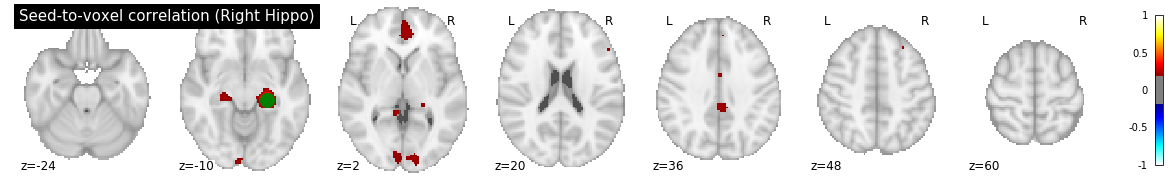

In [96]:
import scipy
import numpy as np
hippocampus_coors = [(24,-28,-10)]
# start with simple t test and tresholding
test = scipy.stats.ttest_1samp(fmri_Hipp_masked_ses1,0,0)
%matplotlib inline
# mean across subjects
mean_zcor = np.mean(fmri_Hipp_masked_ses1,0)
# before using that we need to run and fit brain masker at least on one subject

mean_zcor_img = brain_masker.inverse_transform(mean_zcor.T)
from nilearn import plotting
display = plotting.plot_stat_map(mean_zcor_img,
                                     threshold=0.2, vmax=1,
                                     
                                     title="Seed-to-voxel correlation (Right Hippo)", display_mode = 'z',
                                     )
display.add_markers(marker_coords=hippocampus_coors, marker_color='g',
                    marker_size=200)

Number of voxels crossed the FWE thr is 1115
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([0., ..., 0.]), <nibabel.nifti1.Nifti1Image object at 0x7f96709fc650>)
___________________________________________________________unmask - 0.1s, 0.0min


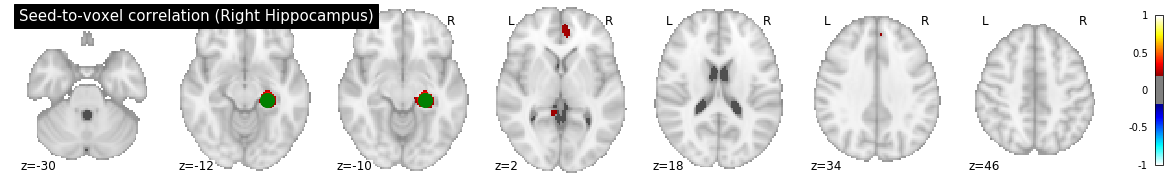

In [97]:
# treshold
#FWE
FWE_thr = 0.05/len(mean_zcor)
# create new matrix for correction
corr_mat_thr = np.array(mean_zcor)
# now I can treshold the mean matrix
corr_mat_thr[test[1]>FWE_thr] = 0 # everything that has p value larger than treshold becomes zero 
numNonZero = np.count_nonzero(corr_mat_thr)
print (f'Number of voxels crossed the FWE thr is {numNonZero}')
# transofrm it back to nifti
thr_nifti = brain_masker.inverse_transform(corr_mat_thr.T)
%matplotlib inline
display = plotting.plot_stat_map(thr_nifti,
                                      vmax=1,
                                     threshold = 0.2,
                                     title="Seed-to-voxel correlation (Right Hippocampus)", display_mode = 'z',
                                     )
display.add_markers(marker_coords=hippocampus_coors, marker_color='g',
                    marker_size=200)

In [206]:
# run the same for session 2
brain_masker.fit(files_ses2_h)

test = scipy.stats.ttest_1samp(fmri_Hipp_masked_ses2,0,0)
%matplotlib inline
# mean across subjects
mean_zcor = np.mean(fmri_Hipp_masked_ses2,0)
# before using that we need to run and fit brain masker at least on one subject
mean_zcor.shape

[NiftiMasker.fit] Loading data from [/home/or/kpe_conn/trauma_seed_hippocampus_right_sub-1343_ses-2_z.nii.gz, /home/or/kpe_conn/trauma_seed_hippocampus_right_sub-1364_ses-2_z.nii.gz, /home/or/kpe_conn/trauma_seed_hippocampus_right_sub-1
[NiftiMasker.fit] Computing the mask
[Memory]  254.9s, 4.2min: Loading compute_background_mask...
[NiftiMasker.fit] Resampling mask
[Memory]  254.9s, 4.2min: Loading resample_img...


(265033,)

[Memory]  281.8s, 4.7min: Loading unmask...


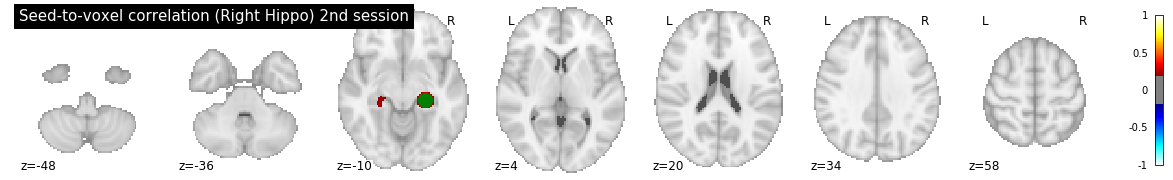

In [207]:
mean_zcor_img = brain_masker.inverse_transform(mean_zcor.T)
from nilearn import plotting
display = plotting.plot_stat_map(mean_zcor_img,
                                     threshold=0.2, vmax=1,
                                     
                                     title="Seed-to-voxel correlation (Right Hippo) 2nd session", display_mode = 'z',
                                     )
display.add_markers(marker_coords=hippocampus_coors, marker_color='g',
                    marker_size=200)

Number of voxels crossed the FWE thr is 488
[Memory]76010.8s, 1266.8min: Loading unmask...


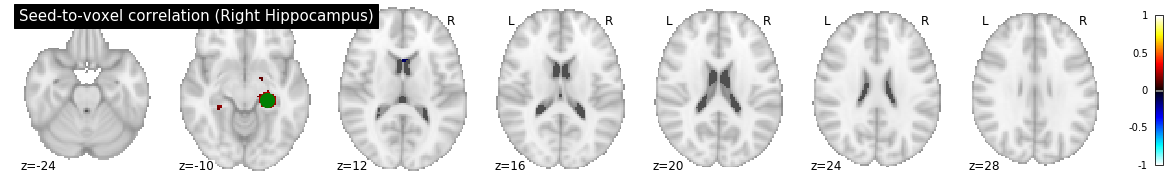

In [99]:
corr_mat_thr = np.array(mean_zcor)
# now I can treshold the mean matrix
corr_mat_thr[test[1]>FWE_thr] = 0 # everything that has p value larger than treshold becomes zero 
numNonZero = np.count_nonzero(corr_mat_thr)
print (f'Number of voxels crossed the FWE thr is {numNonZero}')
# transofrm it back to nifti
thr_nifti = brain_masker.inverse_transform(corr_mat_thr.T)
%matplotlib inline
display = plotting.plot_stat_map(thr_nifti,
                                      vmax=1,
                                     threshold = 0.02,
                                     title="Seed-to-voxel correlation (Right Hippocampus)", display_mode = 'z',
                                     )
display.add_markers(marker_coords=hippocampus_coors, marker_color='g',
                    marker_size=200)

In [158]:
deltaCor = fmri_Hipp_masked_ses2 - fmri_Hipp_masked_ses1
print (f'Shape is: {deltaCor.shape}')

# run paired t-test 
testDelta = scipy.stats.ttest_rel(fmri_Hipp_masked_ses1, fmri_Hipp_masked_ses2) 
np.sum(testDelta[1]<0.05)
#testDelta


Shape is: (21, 265033)


20883

[Memory]164058.6s, 2734.3min: Loading unmask...


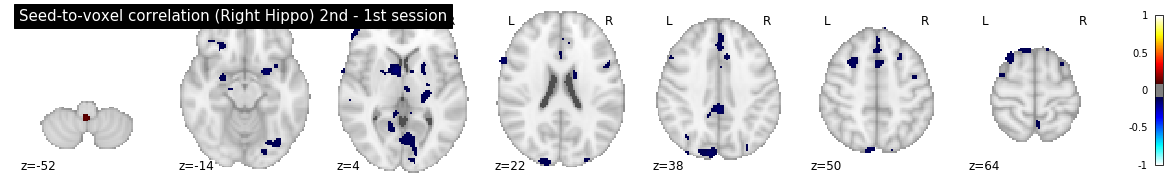

In [160]:
%matplotlib inline
# mean across subjects
mean_zcor_Delta = np.mean(deltaCor,0)
# before using that we need to run and fit brain masker at least on one subject

mean_zcor_img_delta = brain_masker.inverse_transform(mean_zcor_Delta.T)
from nilearn import plotting
display = plotting.plot_stat_map(mean_zcor_img_delta,
                                     threshold=0.1, vmax=1,
                                     
                                     title="Seed-to-voxel correlation (Right Hippo) 2nd - 1st session", display_mode = 'z',
                                     )
display.add_markers(marker_coords=hippocampus_coors, marker_color='g',
                    marker_size=200)

Number of voxels crossed the FWE thr is 0
[Memory]164085.7s, 2734.8min: Loading unmask...


/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


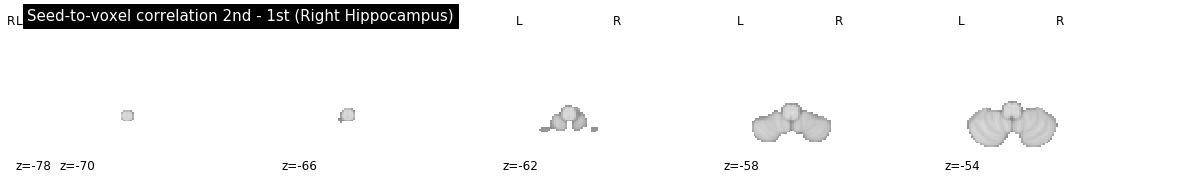

In [162]:
# treshold
FWE_thr = 0.05/len(mean_zcor_Delta)
corr_matDelta_thr = np.array(mean_zcor_Delta)
# now I can treshold the mean matrix
corr_matDelta_thr[testDelta[1]>FWE_thr] = 0 # everything that has p value larger than treshold becomes zero 
numNonZeroDelta = np.count_nonzero(corr_matDelta_thr)
print (f'Number of voxels crossed the FWE thr is {numNonZeroDelta}')
# transofrm it back to nifti
thr_nifti_delta = brain_masker.inverse_transform(corr_matDelta_thr.T)
%matplotlib inline
display = plotting.plot_stat_map(thr_nifti_delta,
                                     vmax=1,
                                     threshold = 0.1,
                                     title="Seed-to-voxel correlation 2nd - 1st (Right Hippocampus)", display_mode = 'z',
                                     )
display.add_markers(marker_coords=hippocampus_coors, marker_color='g',
                    marker_size=200)

In [164]:
testDelta[1].shape
#b.shape

(265033,)

In [193]:
# now lets try FDR
from statsmodels.stats import multitest
# we need to reshape the test p-values array to create 1D array
#b = np.reshape(np.array(testDelta[1]), -1)
#fdr_mat = multitest.multipletests(testDelta[1], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
fdr_mat = multitest.fdrcorrection(testDelta[1], alpha=0.7, method='indep', is_sorted=False)

fdr_mat[1]
#fdr_mat[1]

array([0.64207472, 0.63536307, 0.63566443, ..., 0.63360754, 0.63552497,
       0.63499056])

In [194]:
corr_mat_thrFDR = np.array(mean_zcor_Delta)
corr_mat_thrFDR = np.reshape(corr_mat_thrFDR, -1)
print(f'The number of voxels crossed FDR is {sum(fdr_mat[0])}')
corr_mat_thrFDR[fdr_mat[0]==False] = 0
nifti_fdr_thr = brain_masker.inverse_transform(corr_mat_thrFDR.T)

The number of voxels crossed FDR is 88001
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([-0.041237, ..., -0.032545]), <nibabel.nifti1.Nifti1Image object at 0x7f9670ab37d0>)
___________________________________________________________unmask - 0.1s, 0.0min


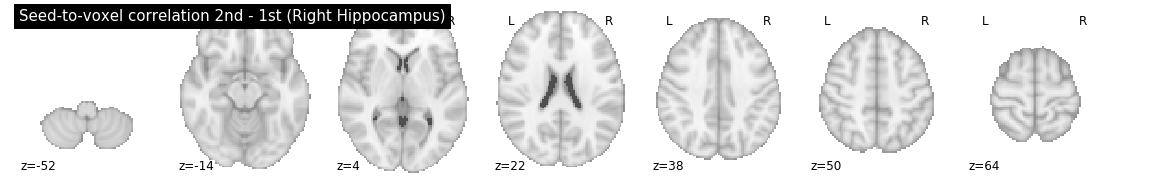

In [196]:
display = plotting.plot_stat_map(nifti_fdr_thr,
                                     vmax=1,
                                     threshold = 0.2,
                                     title="Seed-to-voxel correlation 2nd - 1st (Right Hippocampus)", display_mode = 'z',
                                     )
display.add_markers(marker_coords=hippocampus_coors, marker_color='g',
                    marker_size=200)

In [197]:
# using fslMaths to create differences images (between session 1 and two etc.)
# load those ones
diff_images = glob.glob('/home/or/kpe_conn/fsl/maths/hippRight_ses2-1_*.nii.gz')

In [198]:
from nilearn.input_data import NiftiMasker
# here I use a masked image so all will have same size
nifti_masker = NiftiMasker(
    mask_img= '/media/Data/KPE_fmriPrep_preproc/kpeOutput/derivatives/fmriprep/sub-008/ses-2/func/sub-008_ses-2_task-Memory_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz',
    smoothing_fwhm=5,
    memory='nilearn_cache', memory_level=1)  # cache options
hipp_ses2_1 = nifti_masker.fit_transform(diff_images)

In [200]:
from nilearn import input_data
brain_masker = input_data.NiftiMasker(
        smoothing_fwhm=6,
        detrend=True, standardize=True,
        t_r=1.,
        memory='/media/Data/nilearn', memory_level=1, verbose=2)
brain_masker.fit(diff_images)

[NiftiMasker.fit] Loading data from [/home/or/kpe_conn/fsl/maths/hippRight_ses2-1_1480.nii.gz, /home/or/kpe_conn/fsl/maths/hippRight_ses2-1_1293.nii.gz, /home/or/kpe_conn/fsl/maths/hippRight_ses2-1_1499.nii.gz, /home/or/kpe_conn/fsl/mat
[NiftiMasker.fit] Computing the mask
[Memory]    0.0s, 0.0min: Loading compute_background_mask...
[NiftiMasker.fit] Resampling mask
[Memory]    0.0s, 0.0min: Loading resample_img...


NiftiMasker(detrend=True, dtype=None, high_pass=None, low_pass=None,
            mask_args=None, mask_img=None, mask_strategy='background',
            memory=Memory(cachedir='/media/Data/nilearn/joblib'),
            memory_level=1, sample_mask=None, sessions=None, smoothing_fwhm=6,
            standardize=True, t_r=1.0, target_affine=None, target_shape=None,
            verbose=2)

In [209]:
import scipy
import numpy as np
hippocampus_coors = [(24,-28,-10)]
# start with simple t test and tresholding
test = scipy.stats.ttest_1samp(hipp_ses2_1,0,0)
%matplotlib inline
# mean across subjects
mean_zcor = np.mean(hipp_ses2_1,0)
# before using that we need to run and fit brain masker at least on one subject
mean_zcor.shape

(265033,)

[Memory]  344.7s, 5.7min: Loading unmask...


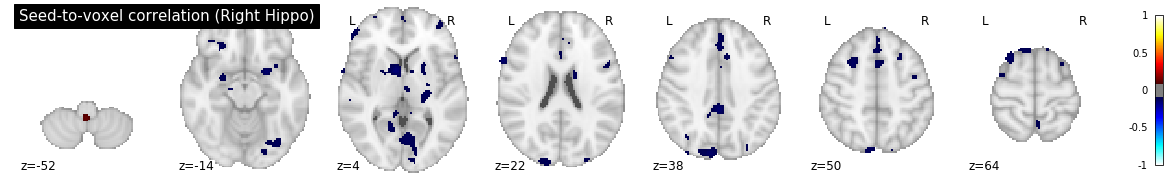

In [211]:
mean_zcor_img = brain_masker.inverse_transform(mean_zcor.T)
from nilearn import plotting
display = plotting.plot_stat_map(mean_zcor_img,
                                     threshold=0.1, vmax=1,
                                     
                                     title="Seed-to-voxel correlation (Right Hippo)", display_mode = 'z',
                                     )
display.add_markers(marker_coords=hippocampus_coors, marker_color='g',
                    marker_size=200)

[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[Memory]    0.0s, 0.0min: Loading resample_img...
[Memory]    0.1s, 0.0min: Loading filter_and_mask...
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[Memory]    0.2s, 0.0min: Loading resample_img...
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask([ '/home/or/kpe_conn/trauma_seed_amg_left _sub-1263_ses-2_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_amg_left _sub-1364_ses-2_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_amg_left _sub-1315_ses-2_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_amg_left _sub-1390_ses-2_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_amg_left _sub-1253_ses-2_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_amg_left _sub-1468_ses-2_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_amg_left _sub-1223_ses-2_z.nii.gz',
  '/home/or/kpe_conn/trauma_seed_amg_left _sub-00

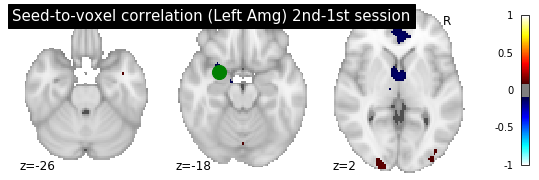

In [260]:
# left Amygdala
# first load all seed based files
files_ses1 = glob.glob('/home/or/kpe_conn/trauma_seed_amg_left_sub-*_ses-1_z.nii.gz')
files_ses2 = glob.glob('/home/or/kpe_conn/trauma_seed_amg_left _sub-*_ses-2_z.nii.gz')

##
# reading the files back
from nilearn.input_data import NiftiMasker
# here I use a masked image so all will have same size
nifti_masker = NiftiMasker(
    mask_img= '/media/Data/KPE_fmriPrep_preproc/kpeOutput/derivatives/fmriprep/sub-008/ses-2/func/sub-008_ses-2_task-Memory_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz',
    smoothing_fwhm=5,
    memory='nilearn_cache', memory_level=1, verbose=2)  # cache options
fmri_AmgL_masked_ses1 = nifti_masker.fit_transform(files_ses1)
fmri_AmgL_masked_ses2 = nifti_masker.fit_transform(files_ses2)

###
from nilearn import input_data
brainMasker = input_data.NiftiMasker(
        smoothing_fwhm=6,
        detrend=True, standardize=True,
        t_r=1.,
        memory='/media/Data/nilearn', memory_level=1, verbose=2)
brainMasker.fit(files_ses1)

####
deltaCor = fmri_AmgL_masked_ses2 - fmri_AmgL_masked_ses1
print (f'Shape is: {deltaCor.shape}')

# run paired t-test 
testDelta = scipy.stats.ttest_rel(fmri_AmgL_masked_ses1, fmri_AmgL_masked_ses2) 
np.sum(testDelta[1]<0.005)

###
# results before thresholding
%matplotlib inline
# mean across subjects
mean_zcor_Delta = np.mean(deltaCor,0)
mean_zcor_Delta.shape

# before using that we need to run and fit brain masker at least on one subject
amygdala_coords = [(-26, 2, -18)]
mean_zcor_img_delta = brain_masker.inverse_transform(mean_zcor_Delta.T)
from nilearn import plotting
display = plotting.plot_stat_map(mean_zcor_img_delta,
                                     threshold=0.1, vmax=1,
                                     cut_coords=amygdala_coords[0],
                                     title="Seed-to-voxel correlation (Left Amg) 2nd-1st session", display_mode = 'z',
                                     )
display.add_markers(marker_coords=amygdala_coords, marker_color='g',
                    marker_size=200)

Number of voxels crossed the FWE thr is 0
[Memory]2111.8s, 35.2min: Loading unmask...


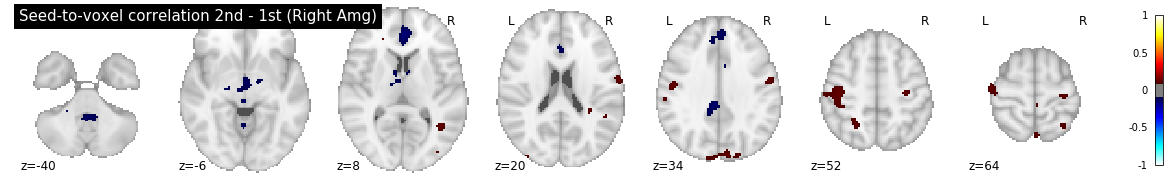

In [268]:
# thresholding - FWE
FWE_thr = 0.05/len(mean_zcor_Delta)
corr_matDelta_thr = np.array(mean_zcor_Delta)
# now I can treshold the mean matrix
corr_matDelta_thr[testDelta[1]>FWE_thr] = 0 # everything that has p value larger than treshold becomes zero 
numNonZeroDelta = np.count_nonzero(corr_matDelta_thr)
print (f'Number of voxels crossed the FWE thr is {numNonZeroDelta}')
# transofrm it back to nifti
thr_nifti_delta = brain_masker.inverse_transform(corr_matDelta_thr.T)
%matplotlib inline
display = plotting.plot_stat_map(thr_nifti_delta,
                                     vmax=1,
                                     threshold = 0.1,
                                     title="Seed-to-voxel correlation 2nd - 1st (Right Amg)", display_mode = 'z',
                                     )
display.add_markers(marker_coords=amygdala_coords, marker_color='g',
                    marker_size=200)

In [266]:
# Thresholding FDR
# now lets try FDR
from statsmodels.stats import multitest
# we need to reshape the test p-values array to create 1D array
#b = np.reshape(np.array(testDelta[1]), -1)
fdr_mat = multitest.multipletests(testDelta[1], alpha=1, method='fdr_bh', is_sorted=False, returnsorted=False)
#fdr_mat = multitest.fdrcorrection(testDelta[1], alpha=0.7, method='indep', is_sorted=False)
np.sum(fdr_mat[1]<0.05)

0

Looking at the difference bwteen amg and hippocampus seed-voxel correlation - we get very little (if any) change. When we do not threshold it seems like there is lower connectivity, but very weak. 